Creating Fake data

In [53]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets._samples_generator import make_blobs
X, Y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=5, random_state=11)

Visualizing data

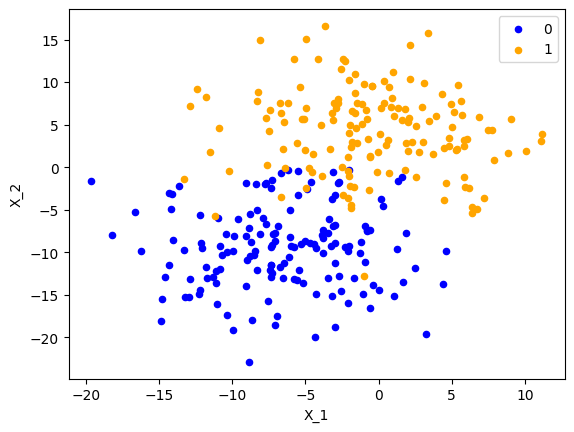

In [54]:
from matplotlib import pyplot as plt
from pandas import DataFrame
df = DataFrame(dict(x=X[:,0], y=X[:,1], label = Y))
colors = {0: 'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color = colors[key])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

S-1 Spliting into batches

In [55]:
def next_batch(X, Y, batch_size):
    for iCnt in np.arange(0, X.shape[0], batch_size):
        yield(X[iCnt: iCnt + batch_size], Y[iCnt: iCnt+batch_size])

S-2 Adding Column of 1's

In [56]:
X = np.c_[np.ones((X.shape[0])), X]
X.shape

(300, 3)

S-3 Logistic Model

In [57]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [58]:
def hx(W,X):
    return sigmoid(np.dot(X,W))

Cost Function - Binary Cross Entropy

In [59]:
def cost(W,X,Y):
    y_pred = hx(W,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

Stochastic Gradient Descent

In [60]:
def grad(W,X,Y):
    y_pred = hx(W,X)
    A = Y * (1-y_pred) - (1-Y)*y_pred
    g = -1* np.dot(A,X)
    return g

In [61]:
def sgd(W_new, W_prev, lr, batch_size, epochs):
    X_, Y_, = shuffle(X,Y, random_state=0)
    for e in range(epochs):
        epoch_loss = []
        X_, Y_, = shuffle(X_, Y_, random_state=0)
        for (batchX, batchY) in next_batch(X_, Y_, batch_size):
            W_prev = W_new
            epoch_loss.append(cost(W_prev, batchX, batchY))
            gradients = grad(W_prev, batchX, batchY)
            W_new = W_prev - lr*gradients
        print(np.average(epoch_loss))
    return W_new

Initializing weights and bias

In [62]:
W = np.random.uniform(size=(X.shape[1],))
W.shape

(3,)

Training the model

In [63]:
print(W)
W = sgd(W, W, .009, 32, 200)
print(W)

[0.32467951 0.14448912 0.31743444]
6.431226313557633
6.383753176415365
6.181407493531244
5.829366816331978
5.970015388502953
5.486528313420686
5.460523442040829
5.183900195169268
5.577711584071267
5.155045202588764
5.204448576130779
5.088333676152148
5.281021788907082
5.036559361380769
5.088946769294601
5.155900218654796
5.272648723973894
5.357275228885587
5.2704725688979375
4.948776610168667
5.154408667987947
4.882986555205116
5.173458946280479
4.9932647005484245
5.085803484549858
5.267953878490987
5.1629813358025824
5.385684160452882
5.023191226013794
4.922206841306997
5.15904722360159
4.78130955038225
5.174502473771945
4.9847678959181625
5.068962553985104
5.131353252372201
5.056185302584014
4.752990465460069
5.044961211769275
5.201690228534401
5.287149244749481
4.697042883035221
5.112198300906067
4.929661789540853
5.51042475783446
4.929908387542731
5.358391952706844
5.110212217737402
5.269643277980954
5.055808418796341
5.127428255490256
5.256574970223162
5.201844932394066
5.29702833

Visualizing

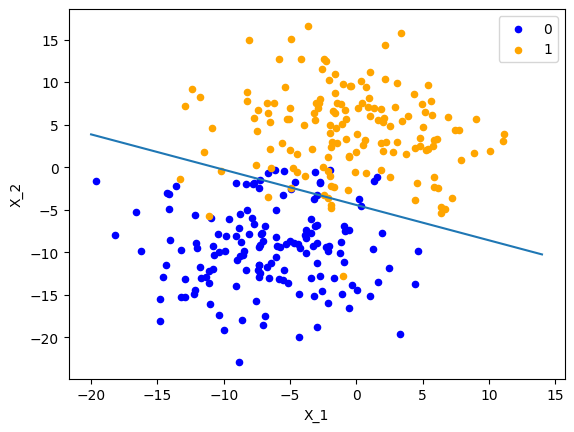

In [67]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x,y)

def my_formula(X):
    return (-W[0] - W[1] *X)/W[2]

from matplotlib import pyplot as plt
from pandas import DataFrame
df = DataFrame(dict(x=X[:,1], y=X[:,2], label = Y))
colors = {0: 'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color = colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()